In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("hybrid_credit_scoring_dataset.csv")
df.head()


,age,monthly_income,employment_tenure_months,income_variance_6m,total_debt,credit_utilization,num_active_loans,credit_dependency_ratio,on_time_payment_rate_6m,missed_payment_count,payment_discipline_momentum,savings_balance,monthly_expenses,financial_shock_resilience_score,creditworthy
0,59,46404.311240,32,0.275864,264971.085229,0.240736,1,0.240736,0.764339,1,0.040969,257833.944456,19789.584737,4.342850,1
1,49,23152.669299,210,0.425752,161250.146304,0.165989,0,0.165989,0.622214,0,-0.010988,127652.852959,14411.380561,2.952525,1
2,35,34193.317477,300,0.466838,204855.669186,0.440895,6,0.440895,0.620407,1,-0.087328,111170.918253,30081.184956,1.231885,1
3,63,19136.177386,181,0.488356,108864.933194,0.077636,5,0.077636,0.958334,3,-0.088344,109330.058654,10760.699200,3.386604,1
4,28,35383.567394,240,0.174478,122470.866445,0.564450,5,0.564450,0.785108,3,-0.026791,58587.798973,21656.962273,0.901741,0


In [3]:
df.shape
df.isnull().sum()
df.describe()


,age,monthly_income,employment_tenure_months,income_variance_6m,total_debt,credit_utilization,num_active_loans,credit_dependency_ratio,on_time_payment_rate_6m,missed_payment_count,payment_discipline_momentum,savings_balance,monthly_expenses,financial_shock_resilience_score,creditworthy
count,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,42.416700,23905.182755,180.227900,0.326529,1.431733e+05,0.284782,3.501450,0.284782,0.715229,1.202700,0.000159,71327.816548,15513.484355,1.613953,0.700000
std,12.607569,9944.929935,103.944663,0.159707,8.383099e+04,0.159142,2.295313,0.159142,0.159581,1.095935,0.148624,53485.948299,7427.763621,1.029898,0.458269
min,21.000000,4710.031469,0.000000,0.050026,1.194037e+04,0.001339,0.000000,0.001339,0.127423,0.000000,-0.672451,3.749513,1899.709148,0.000075,0.000000
25%,32.000000,16807.064351,90.000000,0.188191,8.128899e+04,0.159526,2.000000,0.159526,0.612262,0.000000,-0.100541,30624.505061,10266.568179,0.763685,0.000000
50%,42.000000,22106.220716,181.000000,0.325773,1.256003e+05,0.264255,3.000000,0.264255,0.736359,1.000000,-0.000891,61660.222321,13995.685869,1.536906,1.000000
75%,53.000000,28990.867271,270.000000,0.467715,1.859071e+05,0.387579,6.000000,0.387579,0.839550,2.000000,0.101082,100270.432855,19129.177055,2.304357,1.000000
max,64.000000,132142.174359,359.000000,0.599942,1.013524e+06,0.886423,7.000000,0.886423,0.999380,8.000000,0.581811,500357.177616,87361.839429,4.984293,1.000000


In [4]:
df['creditworthy'].value_counts(normalize=True)


creditworthy
1    0.7
0    0.3
Name: proportion, dtype: float64

c:\Users\shubh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


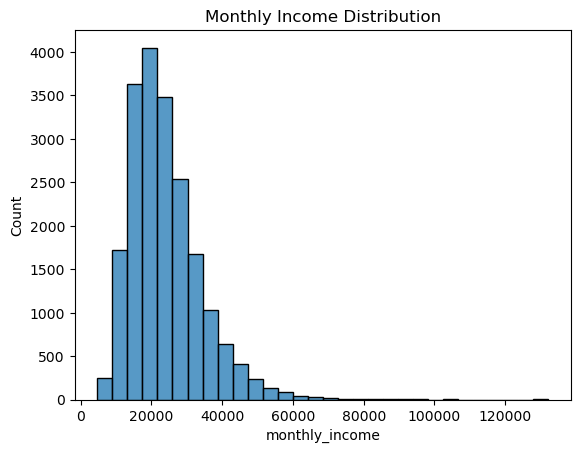

c:\Users\shubh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


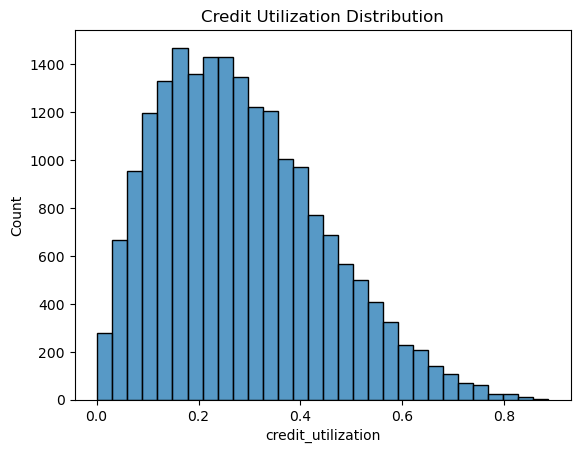

In [5]:
sns.histplot(df['monthly_income'], bins=30)
plt.title("Monthly Income Distribution")
plt.show()

sns.histplot(df['credit_utilization'], bins=30)
plt.title("Credit Utilization Distribution")
plt.show()


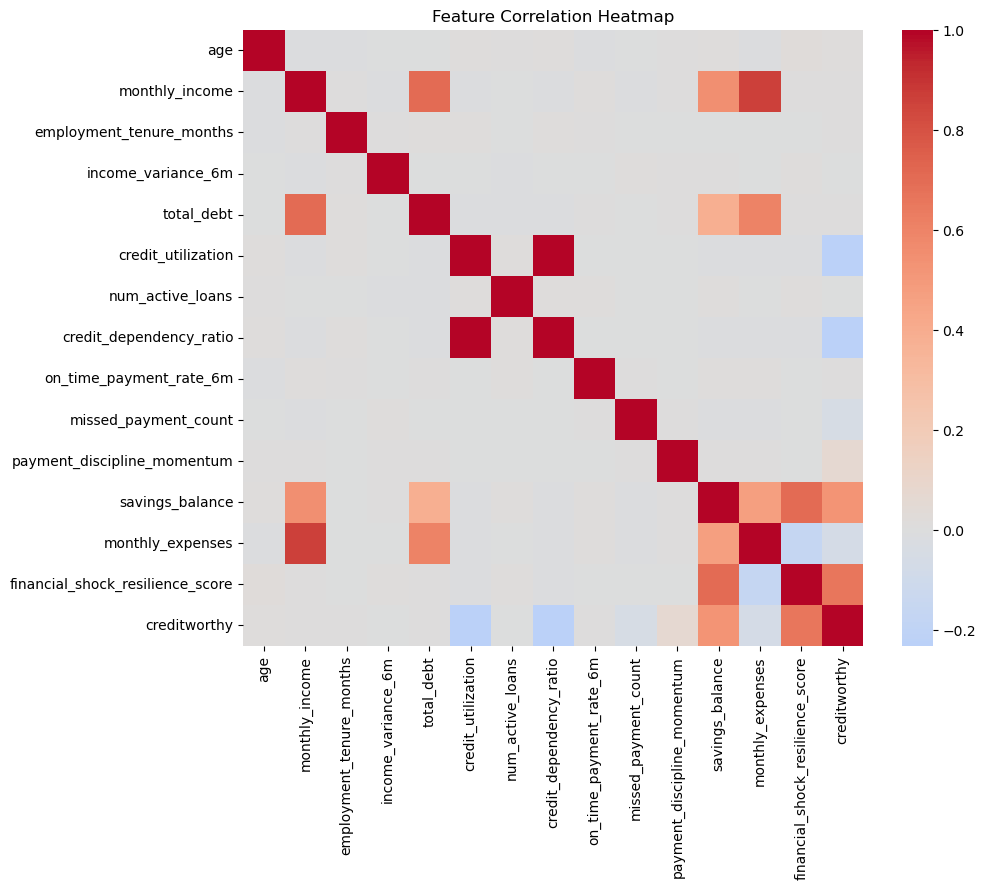

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


In [7]:
df.groupby('creditworthy')[
    ['credit_utilization',
     'missed_payment_count',
     'financial_shock_resilience_score',
     'payment_discipline_momentum']
].mean()


,credit_utilization,missed_payment_count,financial_shock_resilience_score,payment_discipline_momentum
creditworthy,,,,
0,0.341304,1.2825,0.576872,-0.014935
1,0.260558,1.1685,2.058416,0.006628
